# Example 1. Authorizing an application to access NewsAPI data

In [1]:
! pip install newsapi-python

In [2]:
from newsapi import NewsApiClient

# See https://newsapi.org/docs for more information
# on NewsAPI implementation.

API_KEY = 'f16fc93abc7740c48c9526c523229a15'

newsapi = NewsApiClient(api_key=API_KEY)
print(newsapi)

## Back to slides

# Example 2. Retrieving top headlines

In [3]:
top_headlines = newsapi.get_top_headlines(#q='bitcoin',
                                          #sources='bbc-news,the-verge',
                                          #category='business',
                                          language='en',
                                          country='us'
                                          )

In [4]:
print(top_headlines)

{'status': 'ok', 'totalResults': 37, 'articles': [{'source': {'id': 'usa-today', 'name': 'USA Today'}, 'author': 'USA TODAY', 'title': 'Sleeping in flooded bathroom floors: How some tourists braved Hurricane Otis in Acapulco - USA TODAY', 'description': None, 'url': 'https://www.usatoday.com/story/travel/news/2023/10/26/tourists-stranded-acapulco-hurricane-otis/71334175007/', 'urlToImage': None, 'publishedAt': '2023-10-28T14:18:22Z', 'content': None}, {'source': {'id': 'cnn', 'name': 'CNN'}, 'author': 'Jeanne Bonner, Jay Croft, Alaa Elassar', 'title': 'What we know about the victims of the Maine mass shooting - CNN', 'description': 'For the victims of the mass shooting Wednesday night in Lewiston, Maine, it was an ordinary night out. Some were participating in a cornhole tournament while others were enjoying a meal.', 'url': 'https://www.cnn.com/2023/10/27/us/these-are-the-victims-of-the-maine-mass-shootings/index.html', 'urlToImage': 'https://media.cnn.com/api/v1/images/stellar/prod/2

# Saving data!

Very important!

![important](https://media.istockphoto.com/photos/important-picture-id186613912?k=6&m=186613912&s=612x612&w=0&h=bMibIfwwjrEW93VWjr3f-wCJwrNn5nyX4TqfitGxwAk=)

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
! ls gdrive/MyDrive/ds3010_2023

In [7]:
# Temporary for this session
import json
data= json.dumps(top_headlines, indent=1)

file = open('foo.txt','w')
file.write(data)
file.close()

In [8]:
# Saved for later sessions!
data= json.dumps(top_headlines, indent=1)

file = open('gdrive/MyDrive/ds3010_2022/foo.txt','w')
file.write(data)
file.close()

In [9]:
file = open('gdrive/MyDrive/ds3010_2022/foo.txt','r')
foo = file.read()
d = json.loads(foo)

print(len(d['articles']))
for article in d['articles']:
  print(f"author: {article['author']}")
  print(f"title: {article['title']}")
  print(f"description: {article['description']}")

20
author: USA TODAY
title: Sleeping in flooded bathroom floors: How some tourists braved Hurricane Otis in Acapulco - USA TODAY
description: None
author: Jeanne Bonner, Jay Croft, Alaa Elassar
title: What we know about the victims of the Maine mass shooting - CNN
description: For the victims of the mass shooting Wednesday night in Lewiston, Maine, it was an ordinary night out. Some were participating in a cornhole tournament while others were enjoying a meal.
author: 
title: College football schedule, games 2023: What to watch in Week 9, TV channels, Saturday kickoff times - CBS Sports
description: Week 9 features massive games that will shape the landscape of the final month of the season
author: None
title: [Removed]
description: [Removed]
author: None
title: Iranian teen injured on Tehran Metro while not wearing a headscarf has died, state media says - POLITICO
description: The death of Armita Geravand comes after her being in a coma for weeks in Tehran and after the one-year anniv

## Back to slides

# Example 3. Displaying API responses as pretty-printed JSON

In [10]:
import json

#print(json.dumps(world_trends, indent=1))
print(json.dumps(top_headlines, indent=1))

{
 "status": "ok",
 "totalResults": 37,
 "articles": [
  {
   "source": {
    "id": "usa-today",
    "name": "USA Today"
   },
   "author": "USA TODAY",
   "title": "Sleeping in flooded bathroom floors: How some tourists braved Hurricane Otis in Acapulco - USA TODAY",
   "description": null,
   "url": "https://www.usatoday.com/story/travel/news/2023/10/26/tourists-stranded-acapulco-hurricane-otis/71334175007/",
   "urlToImage": null,
   "publishedAt": "2023-10-28T14:18:22Z",
   "content": null
  },
  {
   "source": {
    "id": "cnn",
    "name": "CNN"
   },
   "author": "Jeanne Bonner, Jay Croft, Alaa Elassar",
   "title": "What we know about the victims of the Maine mass shooting - CNN",
   "description": "For the victims of the mass shooting Wednesday night in Lewiston, Maine, it was an ordinary night out. Some were participating in a cornhole tournament while others were enjoying a meal.",
   "url": "https://www.cnn.com/2023/10/27/us/these-are-the-victims-of-the-maine-mass-shootings

In [11]:
for i in range(5):
    print(top_headlines['articles'][i]['url'])

https://www.usatoday.com/story/travel/news/2023/10/26/tourists-stranded-acapulco-hurricane-otis/71334175007/
https://www.cnn.com/2023/10/27/us/these-are-the-victims-of-the-maine-mass-shootings/index.html
https://www.cbssports.com/college-football/news/college-football-schedule-games-2023-what-to-watch-in-week-9-tv-channels-saturday-kickoff-times/
https://removed.com
https://www.politico.com/news/2023/10/28/iranian-teen-injured-on-tehran-metro-while-not-wearing-a-headscarf-has-died-state-media-says-00124089


In [12]:
from IPython.display import Image
from IPython.core.display import HTML

for i in range(5):
  print(top_headlines['articles'][i]['title'])
  try:
    image = Image(url=top_headlines['articles'][i]['urlToImage'])
    display(image)
  except ValueError:
    print('no image')

Sleeping in flooded bathroom floors: How some tourists braved Hurricane Otis in Acapulco - USA TODAY
no image
What we know about the victims of the Maine mass shooting - CNN


College football schedule, games 2023: What to watch in Week 9, TV channels, Saturday kickoff times - CBS Sports


[Removed]
no image
Iranian teen injured on Tehran Metro while not wearing a headscarf has died, state media says - POLITICO


# Example 4. Collecting search results

In [15]:
#  Set this variable to a trending topic,
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

#q = 'Kayne'
#q = 'Paffenroth'
q = 'pickleball'
#q = "andrew"

all_articles = newsapi.get_everything(q='tennis',
                                      #sources='bbc-news,the-verge',
                                      #domains='bbc.co.uk,techcrunch.com',
                                      from_param='2023-10-01',
                                      to='2023-11-02',
                                      language='en',
                                      sort_by='relevancy',
                                      #page=2
                                      )

# Show one sample search result by slicing the list...
print(json.dumps(all_articles, indent=4))


{
    "status": "ok",
    "totalResults": 2046,
    "articles": [
        {
            "source": {
                "id": "business-insider",
                "name": "Business Insider"
            },
            "author": "Grace Eliza Goodwin",
            "title": "Take a look inside Florida's new golf course that boasts a $1 million membership fee and private yacht club",
            "description": "The Shell Bay Club plans to feature an indoor-outdoor wellness spa, four Grand Slam tennis courts, and a private marina on the Atlantic Ocean.",
            "url": "https://www.businessinsider.com/florida-golf-resort-shell-bay-club-million-dollar-membership-photos-2023-10",
            "urlToImage": "https://i.insider.com/6520341f6e038039826bd225?width=1200&format=jpeg",
            "publishedAt": "2023-10-07T10:23:01Z",
            "content": "A rendering of the golf course and facilities.Shell Bay\r\n<ul>\n<li>South Florida is getting its first new private golf course in 25 years.\u00a0

## Back to slides

# Example 5. Extracting authors, sources, and descriptions from articles

In [16]:
import time

authors = [ article['author'] for article in all_articles['articles'] ]

sources = [ article['source']['name'] for article in all_articles['articles'] ]

descriptions = [ article['description'] for article in all_articles['articles'] ]

# Compute a collection of all words from all tweets
words = [ w
          for d in descriptions
              for w in d.split() ]

# Explore the first 5 items for each...

print(json.dumps(authors[0:5], indent=1))
print(json.dumps(sources[0:5], indent=1))
print(json.dumps(descriptions[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "Grace Eliza Goodwin",
 "Sawdah Bhaimiya",
 "Ben Lovejoy",
 "Jason Keil",
 "Blair Marnell"
]
[
 "Business Insider",
 "Business Insider",
 "9to5Mac",
 "Lifehacker.com",
 "Digital Trends"
]
[
 "The Shell Bay Club plans to feature an indoor-outdoor wellness spa, four Grand Slam tennis courts, and a private marina on the Atlantic Ocean.",
 "Sporty students are more likely to hold MBAs from elite institutions and earn more than their non-athletic classmates, a new study found.",
 "Pickleball has been named the fastest-growing sport in America, combining elements of tennis, table-tennis, and badminton. But when it comes to tennis versus pickleball, which offers the greatest health benefits?\n\n\n\nThat\u2019s a question a research study is tackl\u2026",
 "Before Barbie\u00a0tiptoed her way into theaters, 2023's number one movie was an animated kid\u2019s flick based on a video game about a plumber taking mushrooms, a primate with daddy issues, and a giant fire-breathing turtle crooning ab

# Example 6. Creating a basic frequency distribution from the words in articles

In [17]:
from collections import Counter

for item in [authors, sources, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[('Brendan Griffiths', 13), (None, 12), ('Tim Newcomb, Contributor, \n Tim Newcomb, Contributor\n https://www.forbes.com/sites/timnewcomb/', 5), ('Eric Blum', 2), ('Theron Mohamed', 2), ('AV Club Staff', 2), ('forbes.com', 2), ('TMZ Staff', 2), ('Grace Eliza Goodwin', 1), ('Sawdah Bhaimiya', 1)]
[('Business Insider', 29), ('Forbes', 10), ('BBC News', 5), ('The A.V. Club', 3), ('Biztoc.com', 3), ('Sky Sports', 3), ('Deadspin', 2), ('NPR', 2), ('Bleacher Report', 2), ('Highsnobiety', 2)]
[('the', 102), ('a', 79), ('and', 73), ('to', 52), ('of', 50), ('in', 46), ('with', 30), ('The', 29), ('on', 28), ('is', 26)]


# Example 7. Using prettytable to display tuples in a nice tabular format

In [18]:
from prettytable import PrettyTable

for label, data in (('Word', words),
                    ('Author', authors),
                    ('Source', sources)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+------+-------+
| Word | Count |
+------+-------+
| the  |   102 |
| a    |    79 |
| and  |    73 |
| to   |    52 |
| of   |    50 |
| in   |    46 |
| with |    30 |
| The  |    29 |
| on   |    28 |
| is   |    26 |
+------+-------+
+-------------------------------------------+-------+
| Author                                    | Count |
+-------------------------------------------+-------+
| Brendan Griffiths                         |    13 |
| None                                      |    12 |
| Tim Newcomb, Contributor,                 |     5 |
|  Tim Newcomb, Contributor                 |       |
|  https://www.forbes.com/sites/timnewcomb/ |       |
| Eric Blum                                 |     2 |
| Theron Mohamed                            |     2 |
| AV Club Staff                             |     2 |
| forbes.com                                |     2 |
| TMZ Staff                                 |     2 |
| Grace Eliza Goodwin                       |     1 |
| Sawd

## Back to slides

# Example 8. Calculating lexical diversity for articles

In [19]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(average_words(descriptions))

0.5331452750352609
28.36


## Back to slides

## Back to slides

#  Example 10. Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

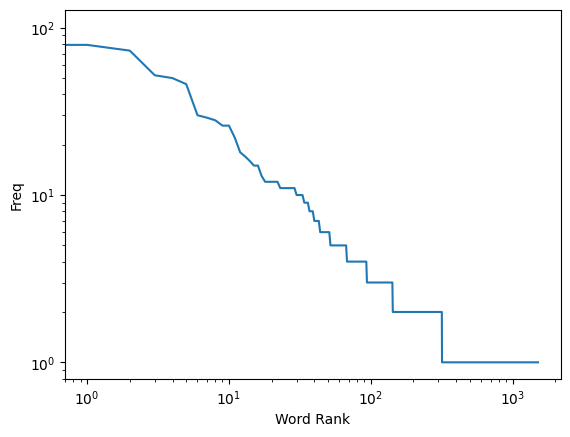

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Example 11.  All possible sources (needs to be moved)

In [21]:
sources = newsapi.get_sources()

In [22]:
print(sources)

{'status': 'ok', 'sources': [{'id': 'abc-news', 'name': 'ABC News', 'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.', 'url': 'https://abcnews.go.com', 'category': 'general', 'language': 'en', 'country': 'us'}, {'id': 'abc-news-au', 'name': 'ABC News (AU)', 'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.", 'url': 'http://www.abc.net.au/news', 'category': 'general', 'language': 'en', 'country': 'au'}, {'id': 'aftenposten', 'name': 'Aftenposten', 'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.', 'url': 'https://www.aftenposten.no', 'category': 'general', 'language': 'no', 'country': 'no'}, {'id': 'al-jazeera-english', 'name': 'Al Jazeera English', 'description': 'News, analysis from the Middle East and worldwide, multim

Example 12. Image segmentation using Hugging Face

In [23]:
pip install -q datasets transformers evaluate timm albumentations


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.3 MB/s eta 0:00:00


In [24]:
from huggingface_hub import notebook_login

notebook_login()

In [25]:
for i in range(5):
  print(top_headlines['articles'][i]['title'])
  try:
    image_url = top_headlines['articles'][i]['urlToImage']
    article = top_headlines['articles'][i]
    image = Image(url=image_url)
    display(image)
    break
  except ValueError:
    print('no image')

Sleeping in flooded bathroom floors: How some tourists braved Hurricane Otis in Acapulco - USA TODAY
no image
What we know about the victims of the Maine mass shooting - CNN


In [26]:
from transformers import pipeline
import requests
from PIL import Image, ImageDraw


In [27]:
image = Image.open(requests.get(image_url, stream=True).raw)

In [28]:
obj_detector = pipeline("object-detection")


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [29]:
results = obj_detector(image)

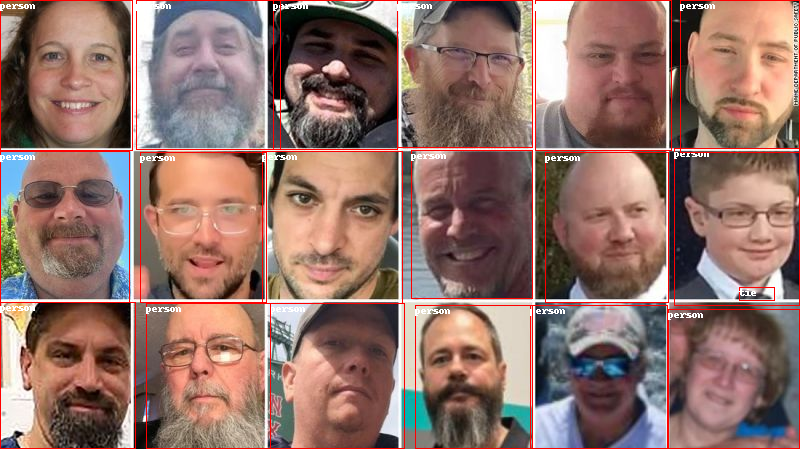

In [30]:
draw = ImageDraw.Draw(image)

for result in results:
    score, label, box = result["score"], result["label"], result["box"]
    x, y, x2, y2 = box['xmin'], box['ymin'], box['xmax'], box['ymax'],
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), label, fill="white")

image